In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj
from plotly.tools import FigureFactory as ff
%matplotlib inline

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")


In [3]:
dataset =pd.read_csv('https://raw.githubusercontent.com/gogzicole/stage-f-07-heart-failure/master/data/heart_failure_clinical_records_dataset.csv')

In [4]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


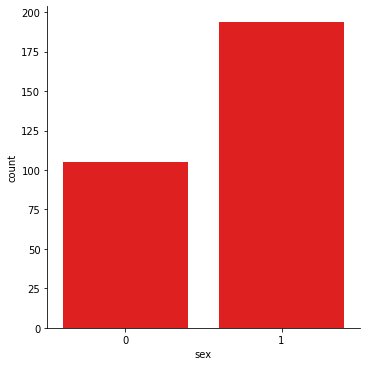

In [7]:
#Count of male and female in dataset
sns.factorplot('sex',data=dataset,kind='count',color='red')

## From this we noticed there are more male to female

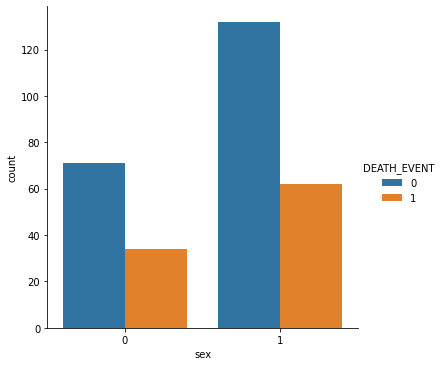

In [8]:
#count of male and female by classes
sns.factorplot('sex',data=dataset,hue='DEATH_EVENT',kind='count')

##  Male survivors are more higher than Female and also Male died more than Female, The blue colour represent survivors and orange dead


In [9]:
dataset.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

##  There is an obvious imbalnce in the target variable

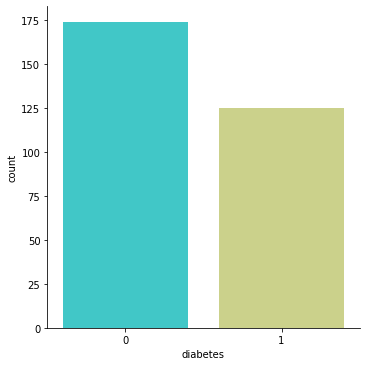

In [10]:
sns.factorplot('diabetes',data=dataset,palette='rainbow',kind='count')

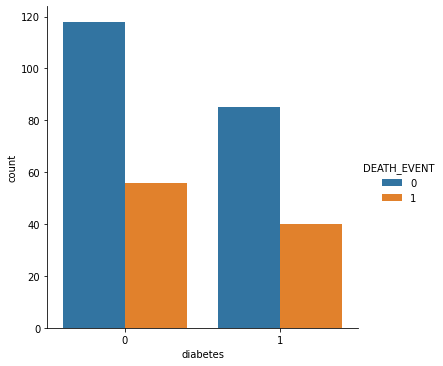

In [11]:
sns.factorplot('diabetes',data=dataset,hue='DEATH_EVENT',kind='count')

## Survived non-diabetic patients are more than the dead non-diabetic patients and Survived diabetic patients are more than the Dead diabetic patients


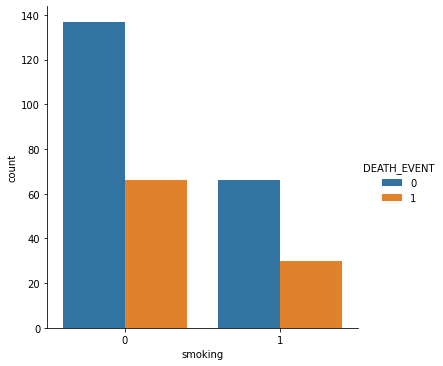

In [12]:
sns.factorplot('smoking',data=dataset,hue='DEATH_EVENT',kind='count')

## Peolpe who did not smoke survived more

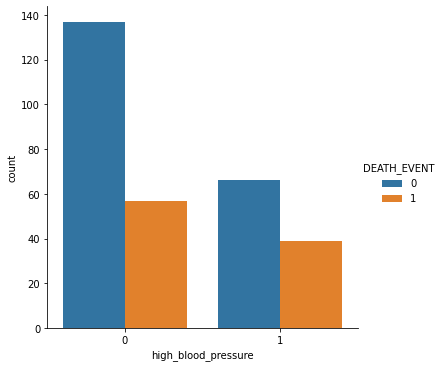

In [25]:
sns.factorplot('high_blood_pressure',data=dataset,hue='DEATH_EVENT',kind='count')

## no high pressure people survived more


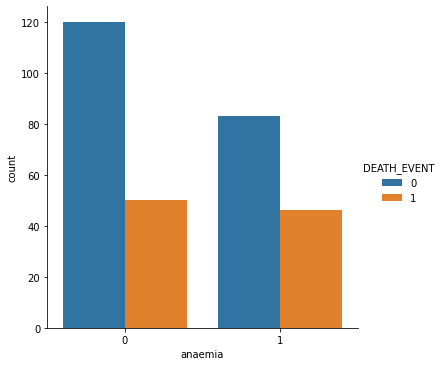

In [13]:

sns.factorplot('anaemia',data=dataset,hue='DEATH_EVENT',kind='count')

## people with no anaemia survived more

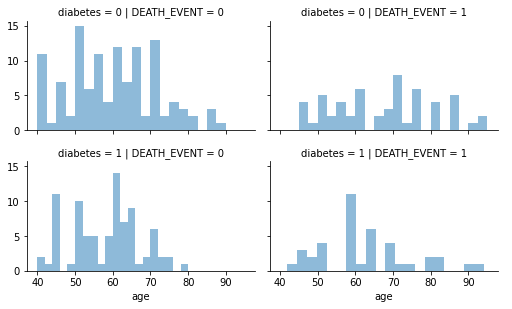

In [14]:
grid = sns.FacetGrid(dataset, col='DEATH_EVENT', row='diabetes', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

## Age 50 had the highest no diabetes and also did not die, while age 70 had the highest no diabetes and died. Age 60 had the highest no of diabetes and also the highest diabetes patients and death

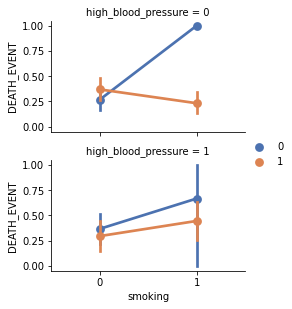

In [15]:
grid = sns.FacetGrid(dataset, row='high_blood_pressure', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'smoking', 'DEATH_EVENT', 'sex', palette='deep')
grid.add_legend()

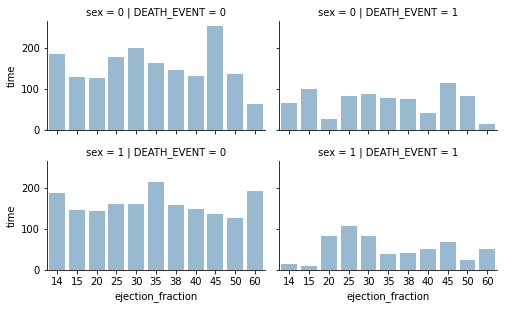

In [16]:
grid = sns.FacetGrid(dataset, row='sex', col='DEATH_EVENT', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'ejection_fraction', 'time', alpha=.5, ci=None)
grid.add_legend()

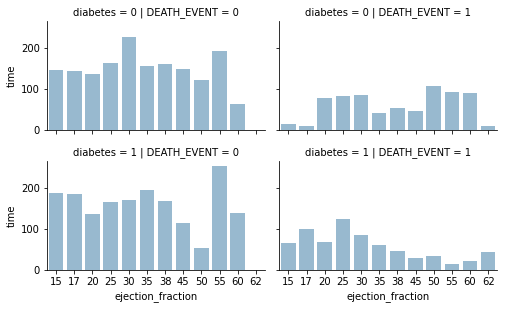

In [17]:
grid = sns.FacetGrid(dataset, row='diabetes', col='DEATH_EVENT', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'ejection_fraction', 'time', alpha=.5, ci=None)
grid.add_legend()

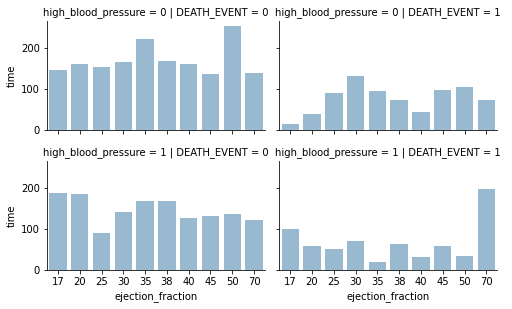

In [18]:
grid = sns.FacetGrid(dataset, row='high_blood_pressure', col='DEATH_EVENT', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'ejection_fraction', 'time', alpha=.5, ci=None)
grid.add_legend()

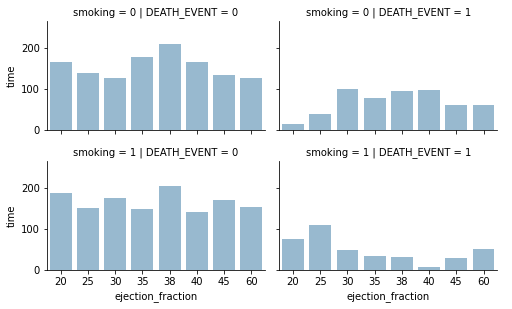

In [19]:
grid = sns.FacetGrid(dataset, row='smoking', col='DEATH_EVENT', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'ejection_fraction', 'time', alpha=.5, ci=None)
grid.add_legend()

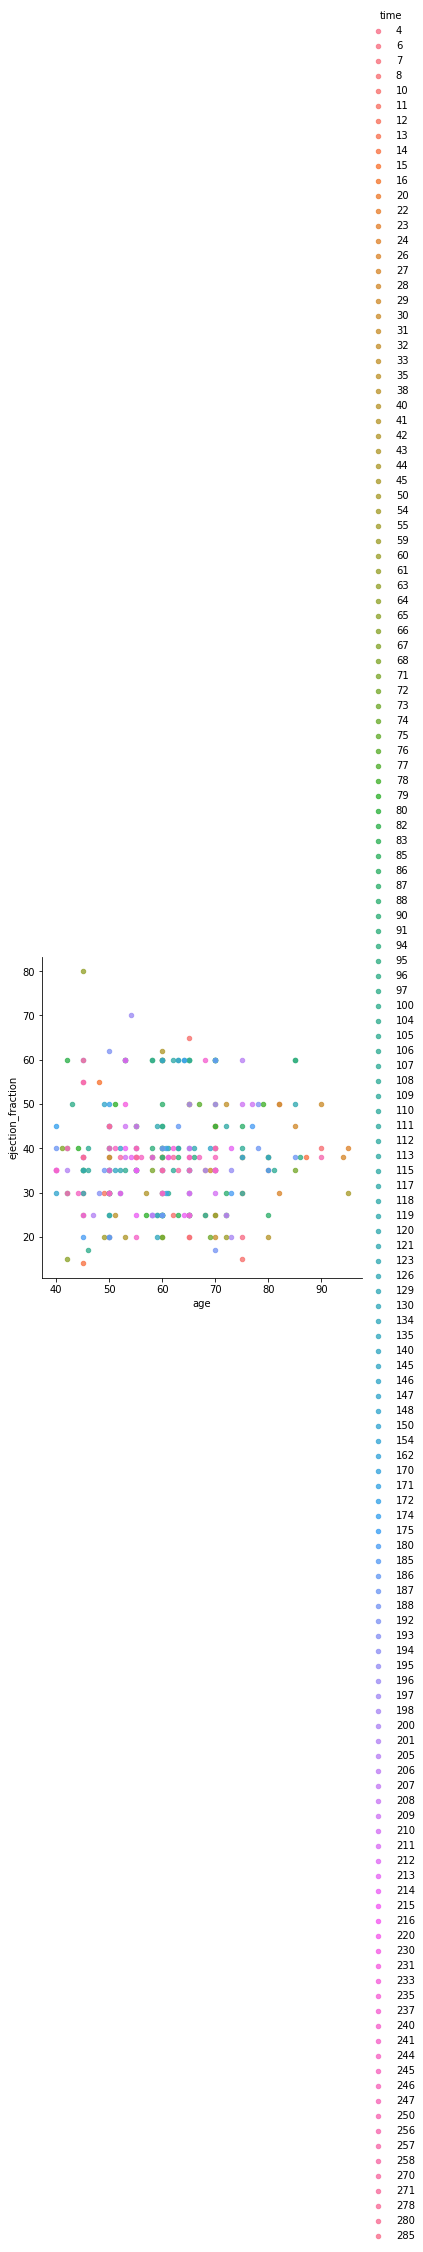

In [20]:
sns.lmplot('age', 'ejection_fraction', data=dataset, fit_reg=False, hue="time", scatter_kws={"marker": ".", "s": 20})


In [21]:
dataset.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

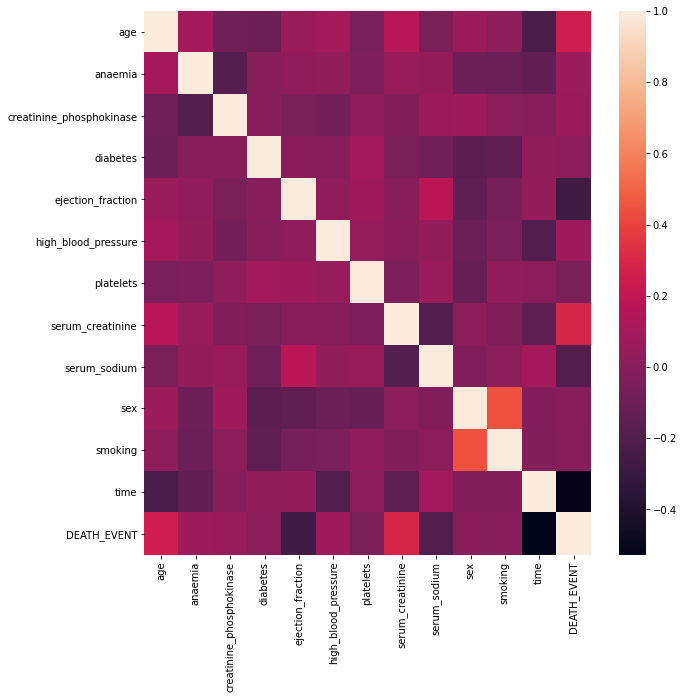

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr())

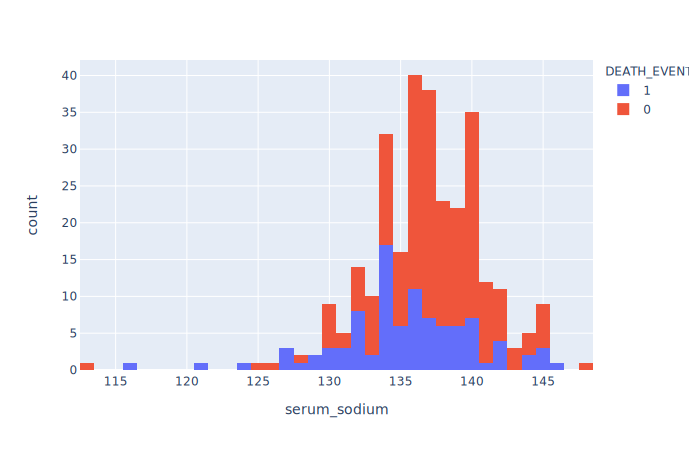

In [29]:
fig = px.histogram(dataset, x = 'serum_sodium', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Serum sodium Vs death event

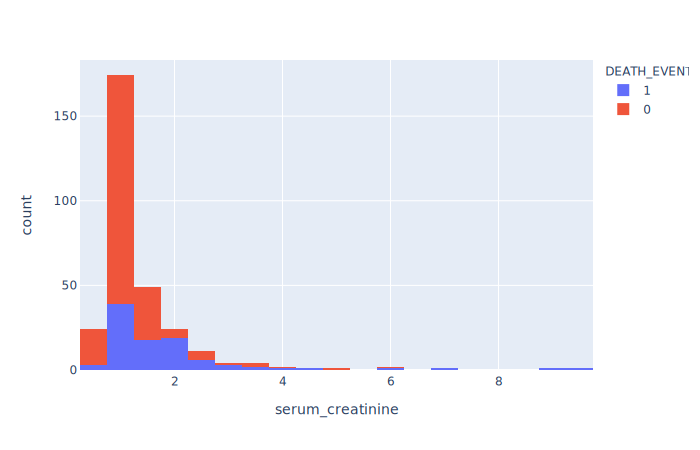

In [30]:
fig = px.histogram(dataset, x = 'serum_creatinine', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Serum creatinine Vs death event

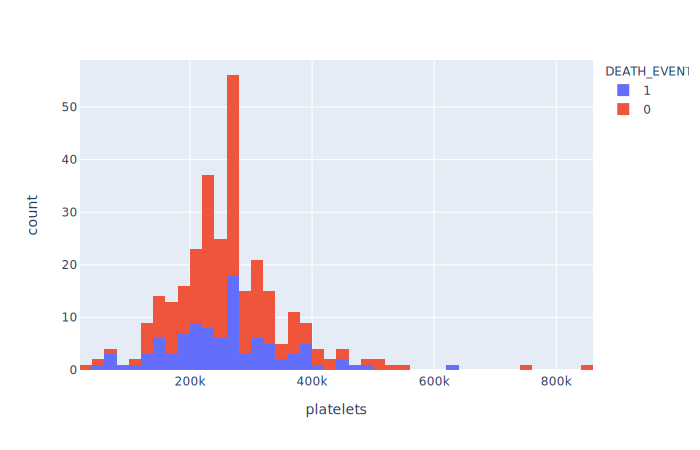

In [31]:
fig = px.histogram(dataset, x = 'platelets', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Platelets Vs Death event

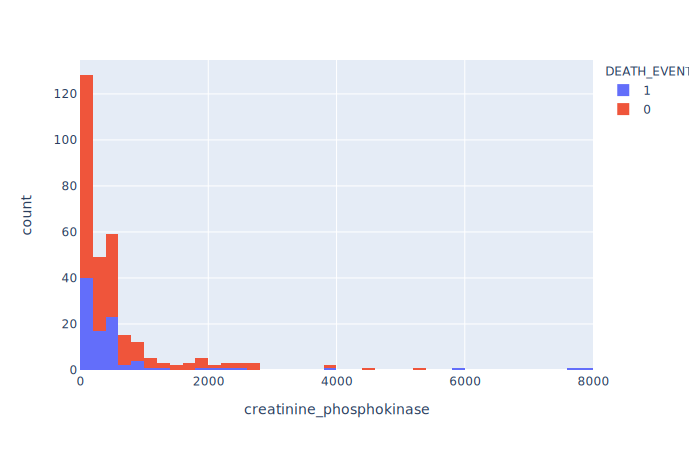

In [32]:
fig = px.histogram(dataset, x = 'creatinine_phosphokinase', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Creatinine phosphokinase Vs death event

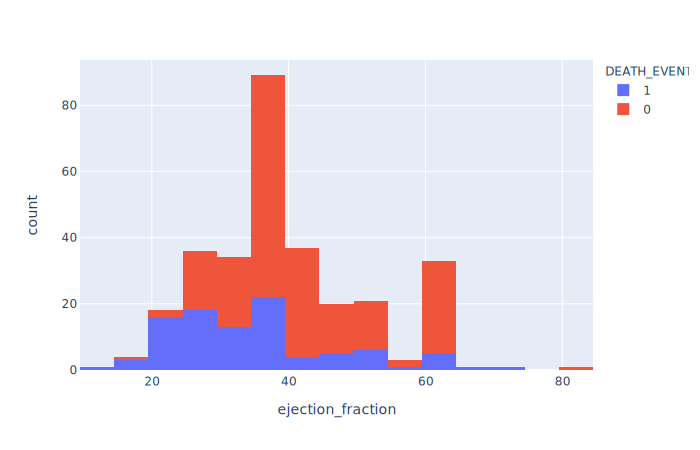

In [33]:
fig = px.histogram(dataset, x = 'ejection_fraction', color = 'DEATH_EVENT')
fig.show(renderer="svg")

## Ejection fraction Vs Death Event

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1 )

In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
x = dataset.drop(['DEATH_EVENT'], axis = 1)
y = dataset['DEATH_EVENT']

In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [31]:
vif.round(1)

,VIF Factor,features
0,29.1,age
1,1.9,anaemia
2,1.4,creatinine_phosphokinase
3,1.8,diabetes
4,12.1,ejection_fraction
5,1.6,high_blood_pressure
6,8.6,platelets
7,2.9,serum_creatinine
8,59.2,serum_sodium
9,3.8,sex


## FROM THE VIF, ANAEMIA AND SMOKING  HAVE THE SAME VARIANCE, WHICH MEANS THEY BOTH EXPLAINS SAME SPECIFIC TERM TOWARDS THE PREDICTION